Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets

## Loading the Dataset:

In [2]:
iris = datasets.load_iris()

## Visualizing the Dataset:

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Creating a DataFrame of the given Iris Data:

In [18]:
"""Creating a DataFrame of a given Iris Dataset"""
df = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width' : iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width' : iris.data[:,3],
    'species': iris.target
})

df.head()

,petal length,petal width,sepal length,sepal width,species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


## Splitting the Data:

In [19]:
from sklearn.model_selection import train_test_split
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


## Evaluation from the Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2,
       1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2,
       2])

## Evaluating the Performance

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.94      0.94      0.94        17
          2       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        45

0.9555555555555556


## Playing with parameters in RandomForestClassifier

There are two main parameters in RandomForestClassifier:
- n_estimators
- criterion

####  n_estimators

In [68]:
"""n_estimators"""
clf = RandomForestClassifier(n_estimators=456)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2,
       2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2,
       2])

In [69]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.94      0.97        17
          2       0.93      1.00      0.97        14

avg / total       0.98      0.98      0.98        45

0.9777777777777777


#### criterion

In [70]:
"""criterion"""
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2,
       1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2,
       2])

In [71]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.94      0.94      0.94        17
          2       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        45

0.9555555555555556


As we can see, by changing the number of **n_estimators** we achieved the **accuracy** of 97%

## Predicting the Flower:

In [74]:
clf.predict([[3,5,4,2]])

array([1])

#### Array[1] indicates the flower type "Iris Setosa"
<hr> </hr>

## Finding Important Features in SCIKIT-learn

In [76]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.463535
petal length (cm)    0.434341
sepal length (cm)    0.083035
sepal width (cm)     0.019089
dtype: float64

### Visualizing the Feature Importance:

No handles with labels found to put in legend.


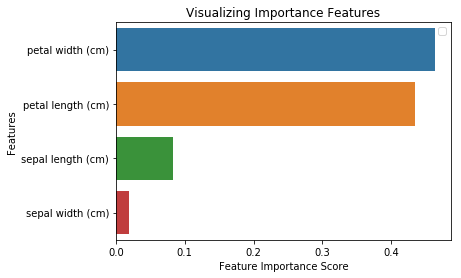

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Importance Features')
plt.legend()
plt.show()

## Generating the Model on Selected Features

In [83]:
"""Splitting the dataset into features and labels"""
X = df[['petal length', 'petal width', 'sepal length']]
Y = df['species']
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.70, random_state=5)